<a href="https://colab.research.google.com/github/LordLean/Acquired-Intelligence-Adaptive-Behaviour/blob/master/AIAB_Labs/Perceptron_Logical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Logical AND Perceptron:**

In [0]:
import numpy as np
from math import exp 
import matplotlib.pyplot as plt
import matplotlib.axes

In [0]:
class Perceptron(object):

    def __init__(self, num_inputs, epochs=10000, learning_rate=0.1):
      self.epochs = epochs # Number of iterations the learning algorithm goes through before ending defaulted to 1000 
      self.learning_rate = learning_rate # Learning rate to determine magnitude of change for our weights during step
      self.weights = np.random.rand(1,(num_inputs+1)).flatten()
      self.graph_points = list()

    def predict(self, inputs): # Inputs with a dimensions equal to that of num_inputs.
      summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
      sigmoid = 1/(1+exp(-summation)) # Step function
      return sigmoid

    def train(self, training_inputs, labels):
      counter = 0
      for _ in range(self.epochs+1):
        # Conditonal to record bias and weights at various epochs for visual demo.
        for inputs, label in zip(training_inputs, labels): # label is expected output of the input vector stored in the `inputs` variable.
          prediction = self.predict(inputs) # pass inputs vector into predict and store in prediction
          self.weights[1:] += self.learning_rate * (label - prediction) * (prediction * (1-prediction)) * inputs
          self.weights[0] += self.learning_rate * (label - prediction) * (prediction * (1-prediction))
        if counter in np.geomspace(10,self.epochs,num=4,dtype=int):
          temp_list = list([counter])
          for i in range(3):
            temp_list.append(self.weights[i])
          self.graph_points.append(temp_list)
        counter+=1

In [95]:
    '''
    def predict_old(self, inputs): # Inputs with a dimensions equal to that of num_inputs.
      summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
      if summation > 0: # Step function
        activation = 1
      else:
        activation = 0 # activation for the sake of being explicit.
      return activation

    def train_old(self, training_inputs, labels):
      for _ in range(self.epochs): 
        for inputs, label in zip(training_inputs, labels):
          # label is expected output of the input vector stored in the `inputs` variable.
          prediction = self.predict(inputs) # pass inputs vector into predict and store in prediction
          self.weights[1:] += self.learning_rate * (label - prediction) * inputs
          self.weights[0] += self.learning_rate * (label - prediction)
    '''

'\ndef predict_old(self, inputs): # Inputs with a dimensions equal to that of num_inputs.\n  summation = np.dot(inputs, self.weights[1:]) + self.weights[0]\n  if summation > 0: # Step function\n    activation = 1\n  else:\n    activation = 0 # activation for the sake of being explicit.\n  return activation\n\ndef train_old(self, training_inputs, labels):\n  for _ in range(self.epochs): \n    for inputs, label in zip(training_inputs, labels):\n      # label is expected output of the input vector stored in the `inputs` variable.\n      prediction = self.predict(inputs) # pass inputs vector into predict and store in prediction\n      self.weights[1:] += self.learning_rate * (label - prediction) * inputs\n      self.weights[0] += self.learning_rate * (label - prediction)\n'

To determine weights:
* predicts an output based on current weights and inputs
* compares it to expected output (label)
* updates its weights if the prediction != the label
* iterate until epoch threshold is reached

To update weights each iteration:
* finds error by subtracting the prediction from the label
* multiplies the error and the learning rate
* multiplies the result to the inputs
* adds the resulting vector to the weight vector

In [0]:
AND_input = np.array([[0,0],[0,1],[1,0],[1,1]])
AND_output = np.array([0,0,0,1])

OR_input = np.array([[0,0],[0,1],[1,0],[1,1]])
OR_output = np.array([0,1,1,1])

In [0]:
perceptron_AND = Perceptron(2)
perceptron_OR = Perceptron(2)

In [168]:
print("Logical AND - Untrained")
for inputs in AND_input:
  print("Input:",inputs, perceptron_AND.predict(inputs),"Output")
print()
perceptron_AND.train(AND_input,AND_output)
print("Logical AND - Trained")
for inputs in AND_input:
  print("Input:",inputs, round(perceptron_AND.predict(inputs),4),"Output")
print()

print("Logical OR - Untrained")
for inputs in OR_input:
  print("Input:",inputs, perceptron_OR.predict(inputs),"Output")
print()
perceptron_OR.train(OR_input,OR_output)
print("Logical OR - Trained")
for inputs in OR_input:
  print("Input:",inputs, round(perceptron_OR.predict(inputs),4),"Output")

Logical AND - Untrained
Input: [0 0] 0.5930504650168188 Output
Input: [0 1] 0.7645608341046197 Output
Input: [1 0] 0.7845720791911808 Output
Input: [1 1] 0.8902962567668814 Output

Logical AND - Trained
Input: [0 0] 0.0002 Output
Input: [0 1] 0.0555 Output
Input: [1 0] 0.0555 Output
Input: [1 1] 0.934 Output

Logical OR - Untrained
Input: [0 0] 0.6040013976924214 Output
Input: [0 1] 0.7815594780897694 Output
Input: [1 0] 0.7956133229584272 Output
Input: [1 1] 0.9012962686590531 Output

Logical OR - Trained
Input: [0 0] 0.0548 Output
Input: [0 1] 0.9658 Output
Input: [1 0] 0.9658 Output
Input: [1 1] 0.9999 Output


10
[0.1423898798690557, 0.6481074769316412, 0.2602696711988343]
100
[-1.2411077393129002, 0.7208137594379633, 0.508071191567396]
1000
[-4.0846575427681655, 2.6465247379056884, 2.6418076300723365]
10000
[-8.313718716169774, 5.481318901582031, 5.480954912059663]


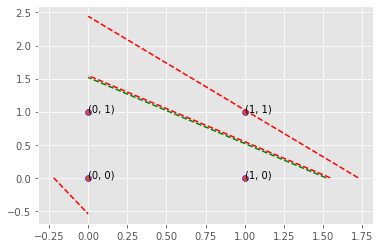

In [159]:
for i in range(len(perceptron_AND.graph_points)):
  print(perceptron_AND.graph_points[i][0])
  print(perceptron_AND.graph_points[i][1:])
  x = [(-perceptron_AND.graph_points[i][1]/perceptron_AND.graph_points[i][2]),0]
  y = [0,(-perceptron_AND.graph_points[i][1]/perceptron_AND.graph_points[i][3])]
  if i == len(perceptron_AND.graph_points)-1:
    plt.plot(x,y,"g--")
  else:
    plt.plot(x,y,"r--")

data_x = np.array([0,0,1,1])
data_y = np.array([0,1,0,1])

plt.style.use("ggplot")
plt.scatter(data_x, data_y,edgecolors="blue")

for i, txt in enumerate(zip(data_x,data_y)):
  plt.annotate(txt, (data_x[i],data_y[i]))

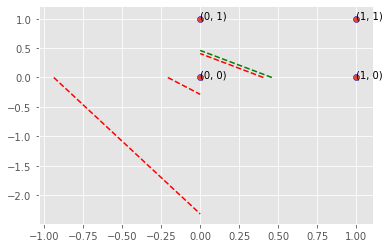

In [164]:
for i in range(len(perceptron_OR.graph_points)):
  x = [(-perceptron_OR.graph_points[i][1]/perceptron_OR.graph_points[i][2]),0]
  y = [0,(-perceptron_OR.graph_points[i][1]/perceptron_OR.graph_points[i][3])]
  if i == len(perceptron_OR.graph_points)-1:
    plt.plot(x,y,"g--")
  else:
    plt.plot(x,y,"r--")

data_x = np.array([0,0,1,1])
data_y = np.array([0,1,0,1])

plt.style.use("ggplot")
plt.scatter(data_x, data_y,edgecolors="blue")

for i, txt in enumerate(zip(data_x,data_y)):
  plt.annotate(txt, (data_x[i],data_y[i]))

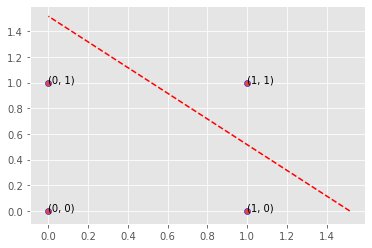

In [157]:
x = [(-perceptron_AND.graph_points[3][1]/perceptron_AND.graph_points[3][2]),0]
y = [0,(-perceptron_AND.graph_points[3][1]/perceptron_AND.graph_points[3][3])]
plt.plot(x,y,"r--")

data_x = np.array([0,0,1,1])
data_y = np.array([0,1,0,1])

plt.style.use("ggplot")
plt.scatter(data_x, data_y,edgecolors="blue")

for i, txt in enumerate(zip(data_x,data_y)):
  plt.annotate(txt, (data_x[i],data_y[i]))


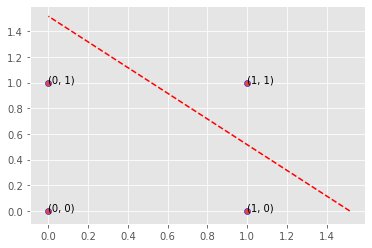

In [143]:
x = [(-perceptron_AND.weights[0]/perceptron_AND.weights[1]),0]
y = [0,(-perceptron_AND.weights[0]/perceptron_AND.weights[2])]
plt.plot(x,y,"r--")

data_x = np.array([0,0,1,1])
data_y = np.array([0,1,0,1])

plt.style.use("ggplot")
plt.scatter(data_x, data_y,edgecolors="blue")

for i, txt in enumerate(zip(data_x,data_y)):
  plt.annotate(txt, (data_x[i],data_y[i]))
